<a href="https://colab.research.google.com/github/atharva-acharya/5SEM-LABS/blob/main/Copy_of_Lab1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find s

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("finddata.csv")
print(data,"\n")

      Time Weather Temperature Company Humidity    Wind Goes
0  Morning   Sunny        Warm     Yes     Mild  Strong  Yes
1  Evening   Rainy        Cold      No     Mild  Normal   No
2  Morning   Sunny    Moderate     Yes   Normal  Normal  Yes
3  Evening   Sunny        Cold     Yes     High  Strong  Yes 



In [ ]:
d = np.array(data)[:,:-1]
print("\n The attributes are: ",d)
target = np.array(data)[:,-1]
print("\n The target is: ",target)


 The attributes are:  [['Morning' 'Sunny' 'Warm' 'Yes' 'Mild' 'Strong']
 ['Evening' 'Rainy' 'Cold' 'No' 'Mild' 'Normal']
 ['Morning' 'Sunny' 'Moderate' 'Yes' 'Normal' 'Normal']
 ['Evening' 'Sunny' 'Cold' 'Yes' 'High' 'Strong']]

 The target is:  ['Yes' 'No' 'Yes' 'Yes']


In [ ]:
def findS(c,t):
    for i, val in enumerate(t):
        if val == "Yes":
            specific_hypothesis = c[i].copy()
            break

    for i, val in enumerate(c):
        if t[i] == "Yes":
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = '?'
                else:
                    pass

    return specific_hypothesis

print("\n The final hypothesis is:",findS(d,target))


 The final hypothesis is: ['?' 'Sunny' '?' 'Yes' '?' '?']


candidate

In [ ]:
import numpy as np
import pandas as pd

#to read the data in the csv file
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
print(data,"\n")

#making an array of all the attributes
concepts = np.array(data.iloc[:,0:-1])
print("The attributes are: ",concepts)

#segragating the target that has positive and negative examples
target = np.array(data.iloc[:,-1])
print("\n The target is: ",target)

#training function to implement candidate_elimination algorithm
def learn(concepts, target):
 specific_h = concepts[0].copy()
 print("\n Initialization of specific_h and general_h")
 print(specific_h)
 general_h = [["?" for i in range(len(specific_h))] for i in
range(len(specific_h))]
 print(general_h)
 for i, h in enumerate(concepts):
     if target[i] == "yes":
         for x in range(len(specific_h)):
             if h[x]!= specific_h[x]:
                 specific_h[x] ='?'
                 general_h[x][x] ='?'
             print(specific_h)
     print(specific_h)
     if target[i] == "no":
         for x in range(len(specific_h)):
             if h[x]!= specific_h[x]:
                 general_h[x][x] = specific_h[x]
             else:
                 general_h[x][x] = '?'
     print("\n Steps of Candidate Elimination Algorithm",i+1)
     print(specific_h)
     print(general_h)
 indices = [i for i, val in enumerate(general_h) if val ==
['?', '?', '?', '?', '?', '?']]
 for i in indices:
     general_h.remove(['?', '?', '?', '?', '?', '?'])
 return specific_h, general_h
s_final, g_final = learn(concepts, target)

#obtaining the final hypothesis
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")

     sky  temp humidity    wind water forcast enjoysport
0  sunny  warm   normal  strong  warm    same        yes
1  sunny  warm     high  strong  warm    same        yes
2  rainy  cold     high  strong  warm  change         no
3  sunny  warm     high  strong  cool  change        yes 

The attributes are:  [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

 The target is:  ['yes' 'yes' 'no' 'yes']

 Initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 

ID3

In [ ]:
import math
import csv
def load_csv(filename):
    lines=csv.reader(open(filename,"r"))
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset,headers

class Node:
    def __init__(self,attribute):
        self.attribute=attribute
        self.children=[]
        self.answer=""

def subtables(data,col,delete):
    dic={}
    coldata=[row[col] for row in data]
    attr=list(set(coldata))

    counts=[0]*len(attr)
    r=len(data)
    c=len(data[0])
    for x in range(len(attr)):
        for y in range(r):
            if data[y][col]==attr[x]:
                counts[x]+=1

    for x in range(len(attr)):
        dic[attr[x]]=[[0 for i in range(c)] for j in range(counts[x])]
        pos=0
        for y in range(r):
            if data[y][col]==attr[x]:
                if delete:
                    del data[y][col]
                dic[attr[x]][pos]=data[y]
                pos+=1
    return attr,dic

def entropy(S):
    attr=list(set(S))
    if len(attr)==1:
        return 0

    counts=[0,0]
    for i in range(2):
        counts[i]=sum([1 for x in S if attr[i]==x])/(len(S)*1.0)

    sums=0
    for cnt in counts:
        sums+=-1*cnt*math.log(cnt,2)
    return sums

def compute_gain(data,col):
    attr,dic = subtables(data,col,delete=False)

    total_size=len(data)
    entropies=[0]*len(attr)
    ratio=[0]*len(attr)

    total_entropy=entropy([row[-1] for row in data])
    for x in range(len(attr)):
        ratio[x]=len(dic[attr[x]])/(total_size*1.0)
        entropies[x]=entropy([row[-1] for row in dic[attr[x]]])
        total_entropy-=ratio[x]*entropies[x]
    return total_entropy

def build_tree(data,features):
    lastcol=[row[-1] for row in data]
    if(len(set(lastcol)))==1:
        node=Node("")
        node.answer=lastcol[0]
        return node

    n=len(data[0])-1
    gains=[0]*n
    for col in range(n):
        gains[col]=compute_gain(data,col)
    split=gains.index(max(gains))
    node=Node(features[split])
    fea = features[:split]+features[split+1:]


    attr,dic=subtables(data,split,delete=True)

    for x in range(len(attr)):
        child=build_tree(dic[attr[x]],fea)
        node.children.append((attr[x],child))
    return node

def print_tree(node,level):
    if node.answer!="":
        print("  "*level,node.answer)
        return

    print("  "*level,node.attribute)
    for value,n in node.children:
        print("  "*(level+1),value)
        print_tree(n,level+2)


def classify(node,x_test,features):
    if node.answer!="":
        print(node.answer)
        return
    pos=features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos]==value:
            classify(n,x_test,features)

'''Main program'''
dataset,features=load_csv("id3.csv")
node1=build_tree(dataset,features)

print("The decision tree for the dataset using ID3 algorithm is")
print_tree(node1,0)
testdata,features=load_csv("id3_test.csv")

for xtest in testdata:
    print("The test instance:",xtest)
    print("The label for test instance:")
    classify(node1,xtest,features)


The decision tree for the dataset using ID3 algorithm is
 Outlook
   sunny
     Humidity
       high
         no
       normal
         yes
   rain
     Wind
       strong
         no
       weak
         yes
   overcast
     yes
The test instance: ['rain', 'cool', 'normal', 'strong']
The label for test instance:
no
The test instance: ['sunny', 'mild', 'normal', 'strong']
The label for test instance:
yes


bayesian classifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

df = pd.read_csv("pima_indian.csv")
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values

print(df.head)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

print ('\n the total number of Training Data :',ytrain.shape)
print ('\n the total number of Test Data :',ytest.shape)

clf = GaussianNB().fit(xtrain,ytrain.ravel())
predicted = clf.predict(xtest)
predictTestData= clf.predict([[6,148,72,35,0,33.6,0.627,50]])

print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))

print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))

print('\n The value of Precision', metrics.precision_score(ytest,predicted))

print('\n The value of Recall', metrics.recall_score(ytest,predicted))

print("Predicted Value for individual Test Data:", predictTestData)

<bound method NDFrame.head of      num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age  diabetes  
0        0.627   50         1  
1        0.351   31         0  
2        0.672   32  

Bayesian network with builtin functions


In [ ]:
!pip install pgmpy

import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

#read Cleveland Heart Disease data
heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

#display the data
print('Sample instances from the dataset are given below')
print(heartDisease.head())

#display the Attributes names and datatyes
print('\n Attributes and datatypes')
print(heartDisease.dtypes)

#Creat Model-Bayesian Network
model =  BayesianModel([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])

#Learning CPDs using Maximum Likelihood Estimators
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)

#Inferencing with Bayesian Network
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

#computing the Probability of HeartDisease given restecg
print('\n 1.Probability of HeartDisease given evidence= restecg :1')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)

#computing the Probability of HeartDisease given cp
print('\n 2.Probability of HeartDisease given evidence= cp:2 ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach      

/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


bayesian network without builtin functions

In [ ]:
!pip install bayespy

import pandas as pd
import bayespy as bp
import numpy as np
import csv
!pip3 install colorama
!pip3 install colorama
from colorama import init
from colorama import Fore, Back, Style
init()

# Define Parameter Enum values
# Age
ageEnum = {'SuperSeniorCitizen': 0, 'SeniorCitizen': 1,
           'MiddleAged': 2, 'Youth': 3, 'Teen': 4}
# Gender
genderEnum = {'Male': 0, 'Female': 1}
# FamilyHistory
familyHistoryEnum = {'Yes': 0, 'No': 1}
# Diet(Calorie Intake)
dietEnum = {'High': 0, 'Medium': 1, 'Low': 2}
# LifeStyle
lifeStyleEnum = {'Athlete': 0, 'Active': 1, 'Moderate': 2, 'Sedetary': 3}
# Cholesterol
cholesterolEnum = {'High': 0, 'BorderLine': 1, 'Normal': 2}
# HeartDisease
heartDiseaseEnum = {'Yes': 0, 'No': 1}


data = pd.read_csv("heart_disease_data.csv")

data =np.array(data, dtype='int8')
N = len(data)

# Input data column assignment
p_age = bp.nodes.Dirichlet(1.0*np.ones(5))
age = bp.nodes.Categorical(p_age, plates=(N,))
age.observe(data[:, 0])

p_gender = bp.nodes.Dirichlet(1.0*np.ones(2))
gender = bp.nodes.Categorical(p_gender, plates=(N,))
gender.observe(data[:, 1])

p_familyhistory = bp.nodes.Dirichlet(1.0*np.ones(2))
familyhistory = bp.nodes.Categorical(p_familyhistory, plates=(N,))
familyhistory.observe(data[:, 2])

p_diet = bp.nodes.Dirichlet(1.0*np.ones(3))
diet = bp.nodes.Categorical(p_diet, plates=(N,))
diet.observe(data[:, 3])

p_lifestyle = bp.nodes.Dirichlet(1.0*np.ones(4))
lifestyle = bp.nodes.Categorical(p_lifestyle, plates=(N,))
lifestyle.observe(data[:, 4])

p_cholesterol = bp.nodes.Dirichlet(1.0*np.ones(3))
cholesterol = bp.nodes.Categorical(p_cholesterol, plates=(N,))
cholesterol.observe(data[:, 5])

# Prepare nodes and establish edges
# np.ones(2) -> HeartDisease has 2 options Yes/No
# plates(5, 2, 2, 3, 4, 3) -> corresponds to options present for domain values
p_heartdisease = bp.nodes.Dirichlet(np.ones(2), plates=(5, 2, 2, 3, 4, 3))
heartdisease = bp.nodes.MultiMixture(
    [age, gender, familyhistory, diet, lifestyle, cholesterol], bp.nodes.Categorical, p_heartdisease)
heartdisease.observe(data[:, 6])
p_heartdisease.update()

#print("Sample Probability")
#print("Probability(HeartDisease|Age=SuperSeniorCitizen, Gender=Female, FamilyHistory=Yes, DietIntake=Medium, LifeStyle=Sedetary, Cholesterol=High)")
#print(bp.nodes.MultiMixture([ageEnum['SuperSeniorCitizen'], genderEnum['Female'], familyHistoryEnum['Yes'], dietEnum['Medium'], lifeStyleEnum['Sedetary'], cholesterolEnum['High']], bp.nodes.Categorical, p_heartdisease).get_moments()[0] [heartDiseaseEnum['Yes']])

# Interactive Test
m = 0
while m == 0:
    print("\n")
    res = bp.nodes.MultiMixture([int(input('Enter Age: ' + str(ageEnum))), int(input('Enter Gender: ' + str(genderEnum))), int(input('Enter FamilyHistory: ' + str(familyHistoryEnum))), int(input('Enter dietEnum: ' + str(
        dietEnum))), int(input('Enter LifeStyle: ' + str(lifeStyleEnum))), int(input('Enter Cholesterol: ' + str(cholesterolEnum)))], bp.nodes.Categorical, p_heartdisease).get_moments()[0][heartDiseaseEnum['Yes']]
    print("Probability(HeartDisease) = " + str(res))

# print(Style.RESET_ALL)
    m = int(input("Enter for Continue:0, Exit :1 "))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bayespy: filename=bayespy-0.5.26-py3-none-any.whl size=377604 sha256=fabb4c56e071e795f45c87f30da7952e27453f6a6081f8871c47fa5fc302d506
  Stored in directory: /root/.cache/pip/wheels/22/39/80/c68869df05e2852c1865471497fc0d2851ca3a85c65d51fee7
Successfully built bayespy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter Age: {'SuperSeniorCitizen': 0, 'SeniorCitizen': 1, 'MiddleAged': 2, 'Youth': 3, 'Teen': 4}0
Enter Gender: {'Male': 0, 'Female': 1}1
Enter FamilyHistory: {'Yes': 0, 'No': 1}1
Enter dietEnum: {'High': 0, 'Medium': 1, 'Low': 2}2
Enter LifeStyle: {'Athlete': 0, 'Active': 1, 'Moderate': 2,

bayesian network with conditional probabilites given

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


!pip install pgmpy

cancer_model=BayesianModel([('Pollution','Cancer'),('Smoker','Cancer'),('Cancer','Xray'),('Cancer','Dyspnoea')])
print('Bayesian network models are :')
print('\t',cancer_model.nodes())
print('Bayesian edges are:')
print('\t',cancer_model.edges())

cpd_poll = TabularCPD(variable='Pollution', variable_card=2,
                      values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable='Smoker', variable_card=2,
                       values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(variable='Cancer', variable_card=2,
                        values=[[0.03, 0.05, 0.001, 0.02],
                                [0.97, 0.95, 0.999, 0.98]],
                        evidence=['Smoker', 'Pollution'],
                        evidence_card=[2, 2])
cpd_xray = TabularCPD(variable='Xray', variable_card=2,
                      values=[[0.9, 0.2], [0.1, 0.8]],
                      evidence=['Cancer'], evidence_card=[2])
cpd_dysp = TabularCPD(variable='Dyspnoea', variable_card=2,
                      values=[[0.65, 0.3], [0.35, 0.7]],
                      evidence=['Cancer'], evidence_card=[2])

# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

cancer_infer=VariableElimination(cancer_model)

print('All local independecies are as follows')
cancer_model.get_independencies()
print('Displaying CPDs')
print(cancer_model.get_cpds('Pollution'))
print(cancer_model.get_cpds('Smoker'))
print(cancer_model.get_cpds('Cancer'))
print(cancer_model.get_cpds('Xray'))
print(cancer_model.get_cpds('Dyspnoea'))

print('\n Probablity of Cancer given smoker')
q=cancer_infer.query(variables=['Cancer'],evidence={'Smoker':1})
print(q)

print('\n Probablity of Cancer given smoker')
q=cancer_infer.query(variables=['Cancer'],evidence={'Smoker':1,'Pollution':1})
print(q)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


Bayesian network models are :
	 ['Pollution', 'Cancer', 'Smoker', 'Xray', 'Dyspnoea']
Bayesian edges are:
	 [('Pollution', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea'), ('Smoker', 'Cancer')]
All local independecies are as follows
Displaying CPDs
+--------------+-----+
| Pollution(0) | 0.9 |
+--------------+-----+
| Pollution(1) | 0.1 |
+--------------+-----+
+-----------+-----+
| Smoker(0) | 0.3 |
+-----------+-----+
| Smoker(1) | 0.7 |
+-----------+-----+
+-----------+--------------+--------------+--------------+--------------+
| Smoker    | Smoker(0)    | Smoker(0)    | Smoker(1)    | Smoker(1)    |
+-----------+--------------+--------------+--------------+--------------+
| Pollution | Pollution(0) | Pollution(1) | Pollution(0) | Pollution(1) |
+-----------+--------------+--------------+--------------+--------------+
| Cancer(0) | 0.03         | 0.05         | 0.001        | 0.02         |
+-----------+--------------+--------------+--------------+--------------+
| Cancer(1) 

lWR

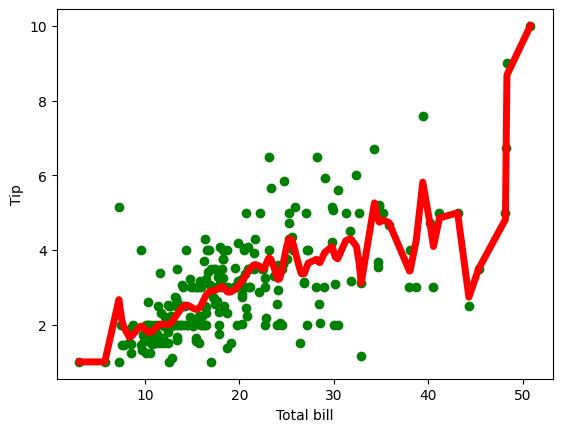

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

# load data points
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None

    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.

        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)

    def predict(self, X):
        '''
        Makes predictions using the simple line equation.

        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

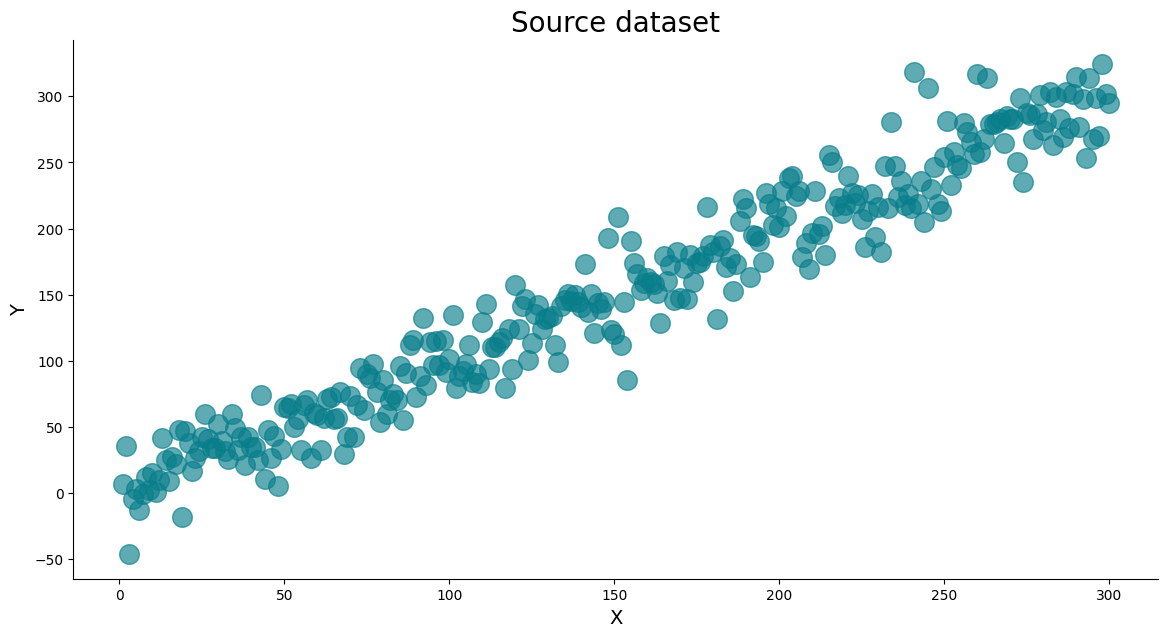

In [ ]:
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
model.b0, model.b1

(-0.8883594906315011, 1.0006997548422816)

In [ ]:
preds


array([203.2543905 , 266.29847505, 152.218703  ,   9.11863806,
       233.27538314, 226.27048486, 196.24949221, 109.18861354,
         5.11583904, 175.23479736, 237.27818216,  57.15222629,
       218.26488682,  45.14382923, 182.23969565, 221.26698608,
       289.31456941, 211.25998854, 148.21590398, 165.22779981,
        78.16692114, 113.19141256, 249.28657922, 250.28727897,
       104.18511477,  42.14172997, 281.30897137, 295.31876794,
       157.22220177, 238.27888192,  17.1242361 , 164.22710006,
        33.13543217,  24.12913438, 215.26278756, 119.19561109,
         7.11723855,  90.1753182 ,  46.14452899,  73.16342237,
        93.17741746,  76.16552163, 286.31247015,  60.15432555,
        77.16622139,  63.15642482, 234.2760829 , 229.27258412,
       111.19001305, 231.27398363, 180.23829614, 144.21310496,
       239.27958167,  75.16482188, 297.32016745, 278.30687211,
        97.18021648,  92.17671771, 192.24669319,  25.12983414])

In [ ]:
y_test

array([239.95763409, 282.82445649, 144.35310316,  15.02679866,
       280.42686563, 213.12289082, 218.89124148, 129.24427636,
       -12.56503989, 174.48878738, 217.60309205,  26.62010087,
       211.6126264 ,  26.10744792, 191.52760771, 227.10329319,
       314.81442014, 195.57498946, 123.47570738, 160.43238537,
        53.7886737 , 110.15478384, 253.80497731, 281.25782886,
        97.61773117,  73.78197577, 302.98268869, 298.92442449,
       153.23305325, 226.46865642,  47.88769929, 178.97139357,
        59.779884  ,  42.55414812, 250.06016629, 156.96466204,
        12.11636392,  88.28848221,  43.20912031,  62.63774485,
       114.39178753,  97.30390329, 303.19690581,  32.67786405,
        76.46342424,  72.25647264, 247.10562891, 216.44212594,
        93.72635781, 247.14559716, 131.42201441, 143.95883599,
       215.49159126,  86.67670835, 324.3073989 , 300.90082344,
       115.80698644,  81.35264433, 194.19774003,  59.63446072])

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

20.763713482809013

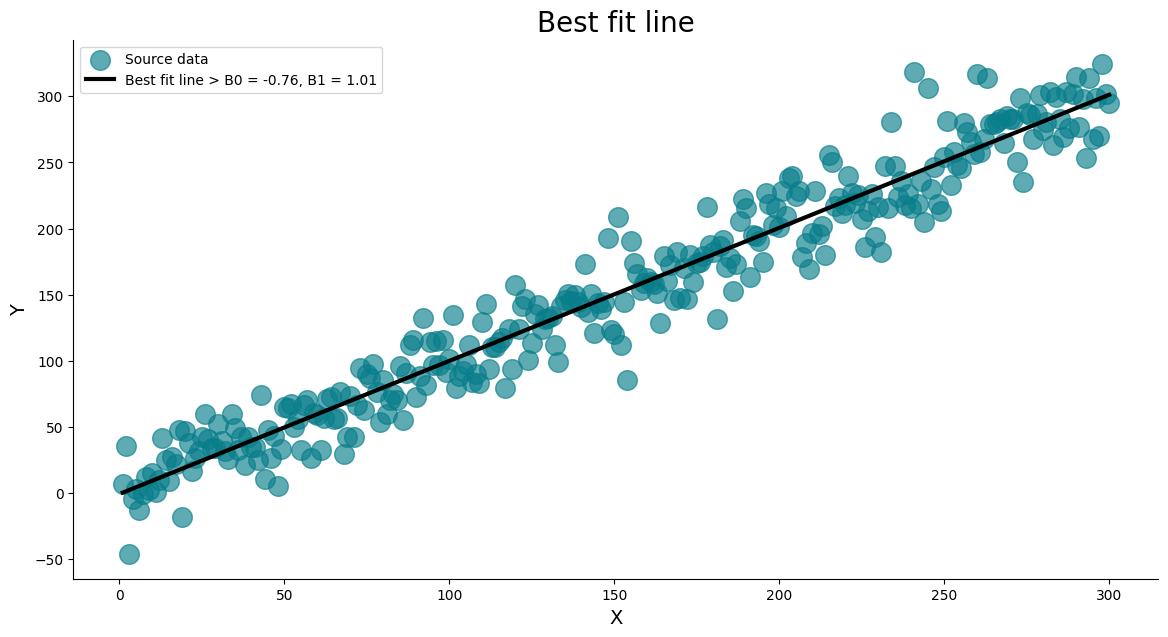

In [ ]:
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

sk_model.intercept_, sk_model.coef_

(-0.8883594906315011, array([1.00069975]))

In [ ]:
rmse(y_test, sk_preds)

20.763713482809013

em Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


<ipython-input-52-f37e2da24b00>:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


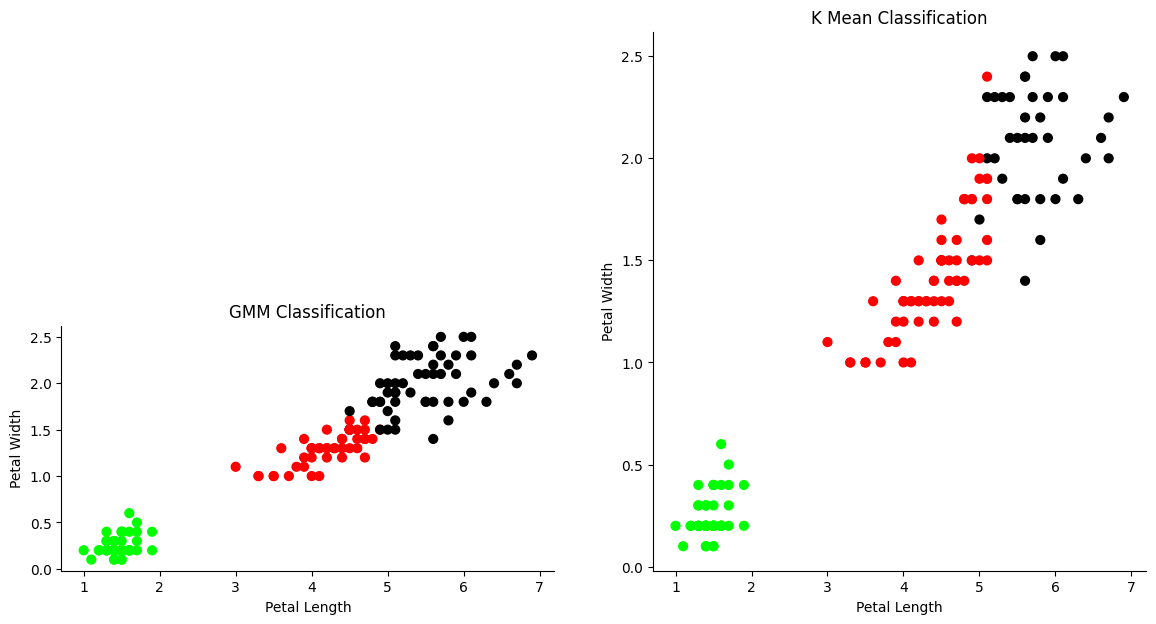

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

iris=datasets.load_iris()

x = iris.data
y = iris.target

print ('sepal-length', 'sepal-width', 'petal-length', 'petal-width')
print(x)
print('class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica')
print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

#To Training the model and Nearest nighbors K=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

#To make predictions on our test data
y_pred=classifier.predict(x_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))


sepal-length sepal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


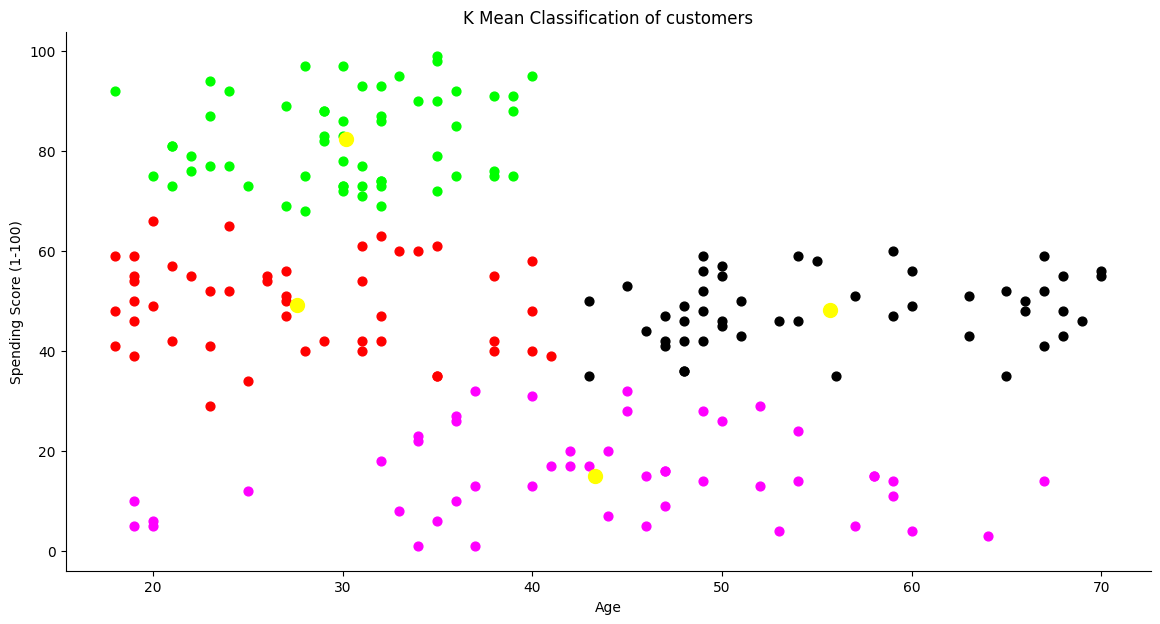

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


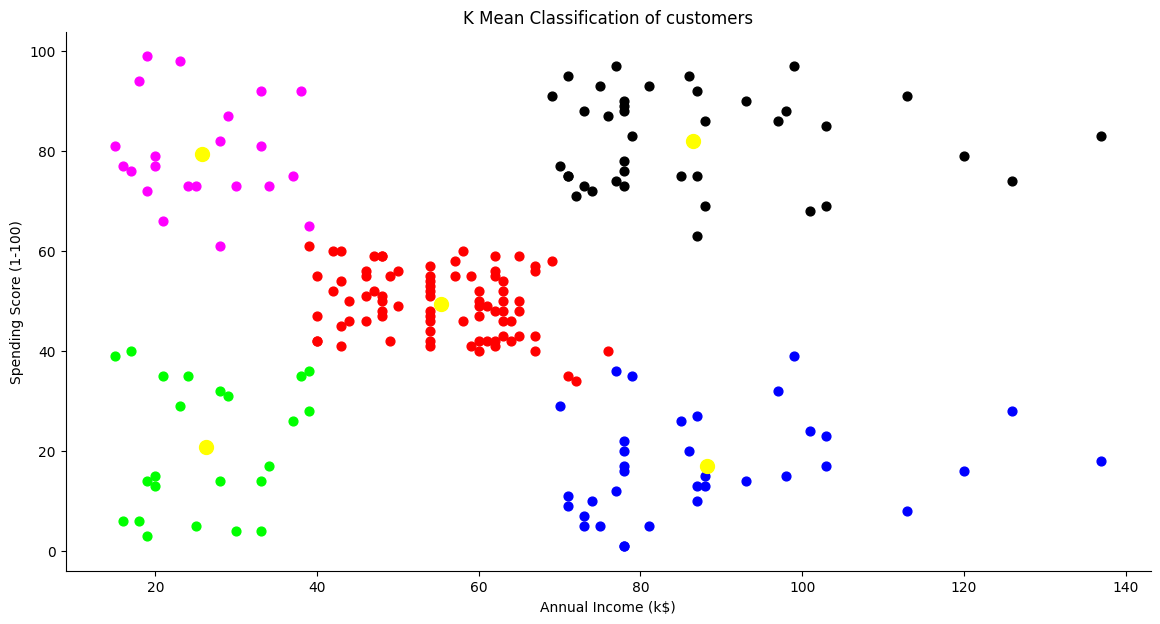

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

dataset = pd.read_csv('mall_customers.csv')
# print(dataset.head())

colormap = np.array(['red', 'lime', 'black','magenta','blue','cyan'])

def kmeans(k,flag):
  if flag:
    x = dataset.iloc[:, [3, 4]].values
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
  else:
    x = dataset.iloc[:, [2, 4]].values
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')

  model = KMeans(n_clusters=k)
  y_predict= model.fit_predict(x)

  plt.title('K Mean Classification of customers')
  for i in range(0,k):
    plt.scatter(x[y_predict == i, 0], x[y_predict == i, 1], s = 40, c = colormap[i])
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'yellow')
  plt.show()


kmeans(4,False) #k=4 clusters based on age and spending score

kmeans(5,True) #k=5 clusters based on income and spending score
